<a href="https://www.kaggle.com/code/rinichristy/cluster-analysis-of-kc-data?scriptVersionId=96059016" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **K-means, K-medoids and  DBSCAN Cluster Analysis of KC House Sale Data**
---------------------------------------------------------
**Part: 4 of King County House Sale**

The aim of this project is to:<br></br>
[Part 1. Explore & Visualize the King County House sale data](https://www.kaggle.com/code/rinichristy/kc-data-exploration-and-visualization); <br>
[Part 2. Statistical Analysis of the data](https://www.kaggle.com/code/rinichristy/statistical-analysis-of-kc-house-sale-data);<br>
[Part 3. Build various regression models to predict the house sale price](https://www.kaggle.com/rinichristy/king-county-house-sale-price-prediction); <br>
[Part 4. K-means, K-medoids and DBSCAN Cluster analysis of KC data](https://www.kaggle.com/code/rinichristy/cluster-analysis-of-kc-data). <br>
[Part 5. Classification Prediction of K-medoids clusters of KC House Sale Data](https://www.kaggle.com/rinichristy/prediction-of-k-medoids-clusters-of-kc-data)

## **Table of Contents**

  * [Data Set Information: King County House Sale Data Set](#Dataset)<br>
  * [Data Exploration](#Explore)<br>
  * [Data Preprocessing](#Preprocessing)<br>
  * [K-means Cluster Analysis](#kmeans)<br>
  * [K-means Cluster data visualization](#Visual1)<br>
  * [K-medoids Cluster Analysis](#kmedoids)<br>
  * [K-medoids Cluster data visualization](#Visual2)<br>
  * [DBSCAN Cluster Analysis](#DBSCAN)  

## **Import the required libraries**

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

## **Load the dataset**

In [2]:
df = pd.read_csv("../input/kc-house/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## **Dataset Information:**<a name ='Dataset'></a>
The King County House sale dataset contains information regarding houses sold during the one year period ranging from May 2014 to May 2015. 

The dataset contains the following information:

| Features |  Description|
|----------------|------------------|
 |Id|            Unique Id for each house sold     |
|Date|         Date of House sale     |
|price |        House sale price     |
|bedrooms|   Number of bedrooms     |
|bathrooms|    Number of bathrooms, where .5 accounts for a bathroom with a toilet but no shower |
|sqft_living|    Square footage of interior living space of the house |
|sqft_lot|           Land area in square feet|
|floors|            Number of floors |
|waterfront|    Label to indicate whether the house was with waterfront or not|
|view|            Labels from 0 to 4 to indicate the view of house.|
|condition|     Labels from 1 to 5 to indicate the condition of the house|
|grade|            Labels from 1 to 13 to indicate the quality levels of construction and design, with 1 to 3 falls in the lowest level, 7 in the average label, and 11-13 in the highest quality level.|
|sqft_above|           Above ground level interior housing space in square feet. |
|sqft_basement| Below ground level interior housing space in square feet. |
|yr_built|            The year of construction of the house ranging from 1900 to 2015     |
|yr_renovated|    The year of last renovation of the house ranging from 1934 to 2015|
|zipcode | Zipcode area of the house|
|lat|   Latitude |
|long|  Longitude |
|sqft_living15| The interior living space in square feet for the nearest 15 neighbors|
|sqft_lot15| The land area in square feet for the nearest 15 neighbors |

## **Data Preprocessing** <a name = 'Preprocessing'></a>

In [3]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### **Outlier Removal**

In [4]:
df.drop(15870, axis = 0, inplace = True)
# reset index, because a row is droped.
df.reset_index(drop=True, inplace = True)
df.shape

(21612, 21)

### **Checking for Missing Values**

In [5]:
df[df.columns[df.isnull().sum()>0]].isnull().sum()

Series([], dtype: float64)

No missing values detected.

## **K-means Cluster Analysis**<a name = 'Cluster'></a>
This part investigates the way clustering algorithms can be used to identify individual neighborhood properties in Kings County. Clustering is similar to classification, but the basis is different. In Clustering we don’t know what we are looking for, and we are trying to identify some segments or clusters in the data. When we use clustering algorithms on the dataset, unexpected things can suddenly pop up like structures, clusters and groupings we would have never thought of.  Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group than those in other groups. In simple words, the aim is to segregate groups with similar traits and assign them into clusters.

K-means clustering to segment the neighborhoods into different clusters is the first algorithm going to be used in this part of the analysis. Kmeans algorithm is an iterative algorithm that tries to partition the dataset into K-pre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. It tries to make the inter-cluster data points as similar as possible while also keeping the clusters as different (far) as possible. It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid (arithmetic mean of all the data points that belong to that cluster) is at the minimum. The less variation there is within clusters, the more homogeneous (similar) the data points are within the same cluster. 

WCSS - within-cluster sum of squares (WCSS) (i.e. variance) is calculated as follows:
<br>
$
WCSS = \sum_{P_i\, in\, Cluster_1}^{m} (distance (P_iC_1)^2) + \sum_{P_i\, in\, Cluster_2}^{m} (distance (P_iC_2)^2) + \sum_{P_i\, in\, Cluster_3}^{m} (distance (P_iC_3)^2)
$

K-means is all about the analysis-of-variance paradigm. ANOVA - both uni- and multivariate - is based on the fact that the sum of squared deviations about the grand centroid is comprised of such scatter about the group centroids and the scatter of those centroids about the grand one: $SS_{total}=SS_{within}+SS_{between}$. So, if $SS_{within}$ is minimized then $SS_{between}$ is maximized.


The goal of the k-means algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided.

When using k-means clustering, to determine the right number of clusters to be used, it needs to be validated by the elbow method. The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (say, k from 1 to 10 as in the run below), and for each value of k calculate the sum of squared errors (SSE). From the plot of line chart of the SSE for each value of k, which looks like an arm, the "elbow" on the arm is selected as the best value of k.

In [6]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### **Normalizing over the standard deviation**
Now normalize the dataset. Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. Use StandardScaler() to normalize the dataset.

In [7]:
df.drop(['date', 'id'], axis = 1, inplace = True)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Clus_dataSet = scaler.fit_transform(df)
Clus_dataSet

array([[-0.86668617, -0.40692359, -1.44745951, ..., -0.30611525,
        -0.94339773, -0.26072358],
       [-0.00567521, -0.40692359,  0.17558163, ..., -0.74637458,
        -0.43272969, -0.18787744],
       [-0.98081575, -1.50829275, -1.44745951, ..., -0.13569228,
         1.07009338, -0.17238527],
       ...,
       [-0.37584455, -1.50829275, -1.77206774, ..., -0.60435544,
        -1.41029422, -0.39414664],
       [-0.38156737, -0.40692359,  0.50018986, ...,  1.02886466,
        -0.84126412, -0.42051628],
       [-0.58585659, -1.50829275, -1.77206774, ..., -0.60435544,
        -1.41029422, -0.41795257]])

**Using the elbow method to find the optimal number of clusters**

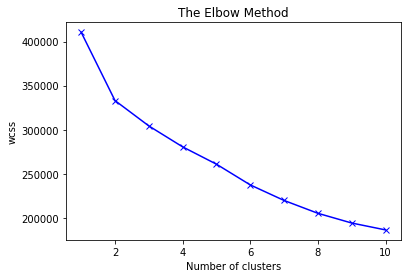

In [8]:
from sklearn.cluster import KMeans
wcss = []
for i in range (1, 11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(Clus_dataSet)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, 'bx-')
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

In [9]:
wcss = pd.DataFrame(wcss, columns = ['wcss'])
wcss['wcss_diff'] = wcss['wcss'].diff()
wcss

,wcss,wcss_diff
0,410628.000000,NaN
1,333091.980471,-77536.019529
2,304302.459848,-28789.520623
3,280522.753879,-23779.705969
4,260854.511520,-19668.242359
5,237314.392223,-23540.119298
6,219665.713164,-17648.679059
7,205090.486869,-14575.226295
8,194050.526199,-11039.960670
9,186230.283880,-7820.242318


In [10]:
wcss[wcss['wcss_diff'] > wcss['wcss_diff'].mean()]

,wcss,wcss_diff
3,280522.753879,-23779.705969
4,260854.511520,-19668.242359
5,237314.392223,-23540.119298
6,219665.713164,-17648.679059
7,205090.486869,-14575.226295
8,194050.526199,-11039.960670
9,186230.283880,-7820.242318


**Run k-means to cluster the County houses into 3 clusters.**

In [11]:
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Clus_dataSet)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:500] 

array([2, 2, 2, 2, 1, 0, 1, 2, 2, 1, 1, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 0,
       1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 0, 0, 2,
       2, 1, 2, 1, 2, 0, 2, 2, 2, 2, 1, 1, 1, 1, 0, 1, 2, 2, 2, 1, 2, 2,
       1, 1, 2, 0, 0, 2, 2, 1, 2, 0, 2, 2, 2, 0, 1, 1, 2, 2, 2, 2, 1, 1,
       1, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 0, 1,
       1, 2, 2, 2, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 1, 2, 1,
       0, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1, 2, 2, 1, 2, 2, 0,
       2, 2, 0, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 1, 1,
       2, 2, 2, 2, 1, 2, 1, 1, 1, 0, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 0, 1, 0, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 1, 0, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2,
       2, 1, 2, 2, 1, 0, 0, 2, 2, 2, 2, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 1,
       1, 2, 1, 2, 1, 2, 1, 1, 2, 0, 2, 1, 2, 2, 0,

In [12]:
kmeans.cluster_centers_[0:2]

array([[ 1.58321503,  0.83425573,  1.24072585,  1.70045029,  0.56561622,
         0.54648412,  0.42865465,  1.01643312, -0.07636403,  1.53129059,
         1.49532745,  0.73097984,  0.35590284,  0.26021147, -0.23374706,
         0.24088712,  0.32173141,  1.5107173 ,  0.58764849],
       [-0.13237083,  0.12949075,  0.45912314,  0.11620545, -0.06963728,
         0.73576283, -0.08717466, -0.22721039, -0.39855753,  0.27639659,
         0.32096563, -0.35939229,  0.80503003, -0.14659548, -0.35559619,
        -0.16534579,  0.42398674,  0.16333871, -0.06486441]])

In [13]:
kmeans.cluster_centers_.shape

(3, 19)

In [14]:
kmeans.labels_.shape

(21612,)

In [15]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
cluster_centers

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1.583215,0.834256,1.240726,1.700450,0.565616,0.546484,0.428655,1.016433,-0.076364,1.531291,1.495327,0.730980,0.355903,0.260211,-0.233747,0.240887,0.321731,1.510717,0.587648
1,-0.132371,0.129491,0.459123,0.116205,-0.069637,0.735763,-0.087175,-0.227210,-0.398558,0.276397,0.320966,-0.359392,0.805030,-0.146595,-0.355596,-0.165346,0.423987,0.163339,-0.064864
2,-0.342898,-0.316221,-0.651609,-0.544052,-0.107301,-0.649948,-0.057918,-0.123391,0.292004,-0.606765,-0.627249,0.044586,-0.644952,0.028565,0.305817,0.046605,-0.376400,-0.524231,-0.116573


**In order to understand what these numbers mean, let's perform inverse transformation**

In [16]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])
cluster_centers

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1.121324e+06,4.126942,3.070331,3641.675041,38535.475702,1.789421,4.462810e-02,1.013223,3.359669,9.456860,3026.669091,615.005950,1981.460165,188.927603,98065.432066,47.593424,-122.168583,3021.993388,28814.056529
1,4.914867e+05,3.487043,2.468372,2186.648239,12222.980465,1.891628,-6.756748e-16,0.060199,3.150033,7.981794,2054.209037,132.439203,1994.652359,25.521860,98058.912558,47.537136,-122.154183,2098.531429,10997.762924
2,4.141966e+05,3.082354,1.612932,1580.243898,10662.913397,1.143374,2.531188e-03,0.139758,3.599349,6.943681,1269.015639,311.228259,1952.062105,95.880311,98094.301302,47.566504,-122.266898,1627.287109,9585.901736


In [17]:
cluster_centers.T

,0,1,2
price,1.121324e+06,4.914867e+05,414196.643735
bedrooms,4.126942e+00,3.487043e+00,3.082354
bathrooms,3.070331e+00,2.468372e+00,1.612932
sqft_living,3.641675e+03,2.186648e+03,1580.243898
sqft_lot,3.853548e+04,1.222298e+04,10662.913397
floors,1.789421e+00,1.891628e+00,1.143374
waterfront,4.462810e-02,-6.756748e-16,0.002531
view,1.013223e+00,6.019934e-02,0.139758
condition,3.359669e+00,3.150033e+00,3.599349
grade,9.456860e+00,7.981794e+00,6.943681


**Create a new dataframe that includes the cluster. Insert clustering labels to the original dataframe**

In [18]:
df.insert(0, 'kmeans Cluster Labels', kmeans.labels_)
df.head()

,kmeans Cluster Labels,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


To check the data type of Cluster labels and identify any null values. This step is very important. Float values and null values give error in the following steps. 

In [19]:
df["kmeans Cluster Labels"].isnull().sum()

0

In [20]:
df["kmeans Cluster Labels"].dtype

dtype('int32')

## **K-means Cluster data visualization**<a name= 'Visual1'></a>

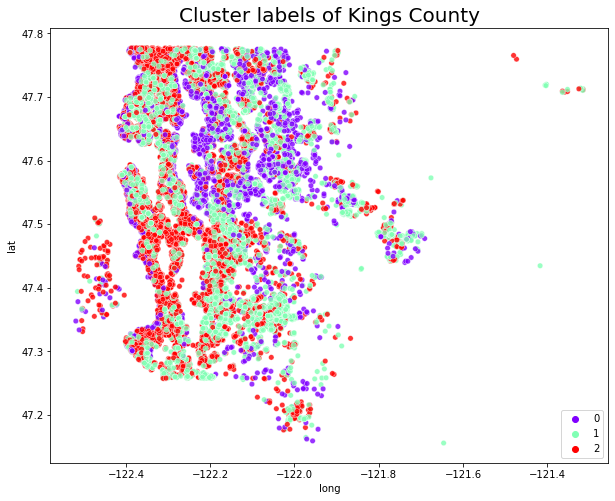

In [21]:
# visualization of the results with a scatter plot
fig = plt.figure(figsize=(10, 8))
plt.title('Cluster labels of Kings County', loc='center', fontsize=20)
sns.scatterplot(x=df.long, y = df.lat, alpha = .8,s = 30, 
                hue=df["kmeans Cluster Labels"], palette="rainbow", legend= 'auto')
plt.legend(loc = 'lower right');

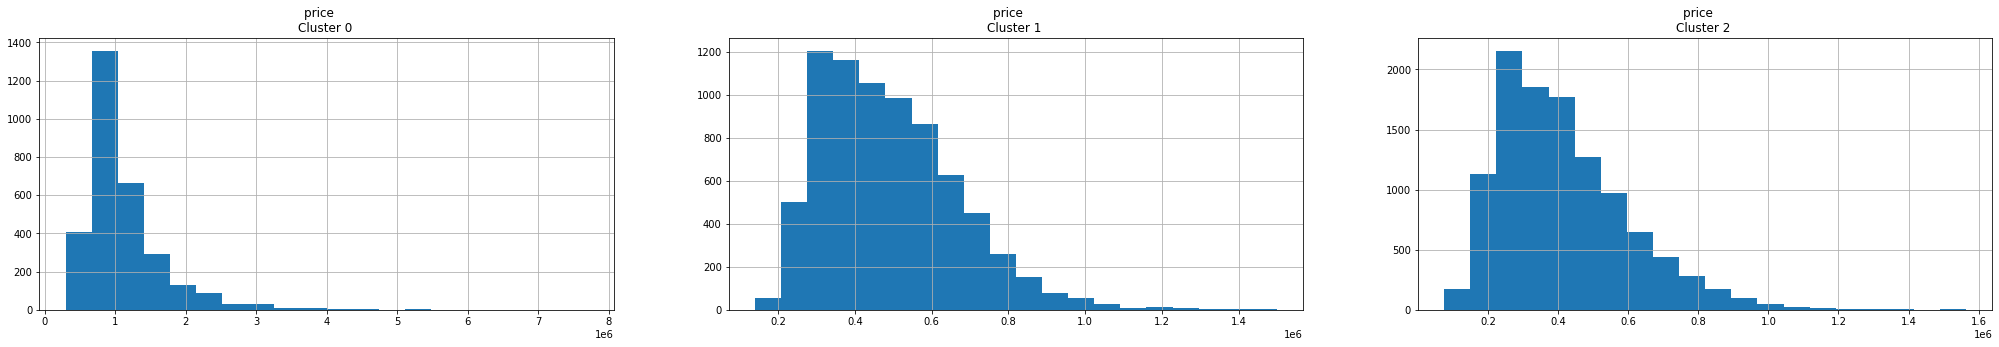

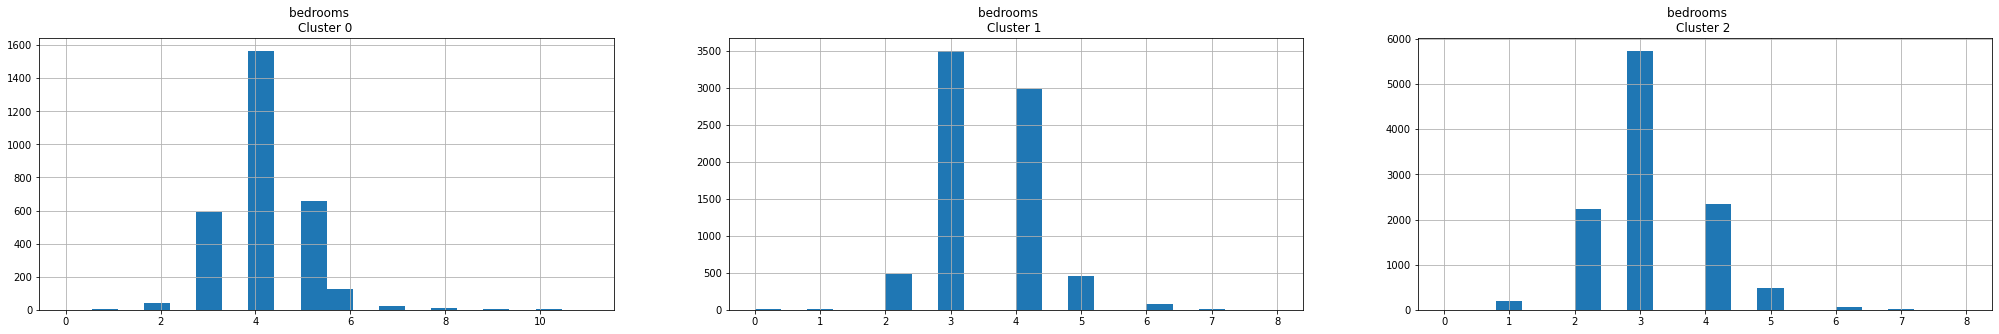

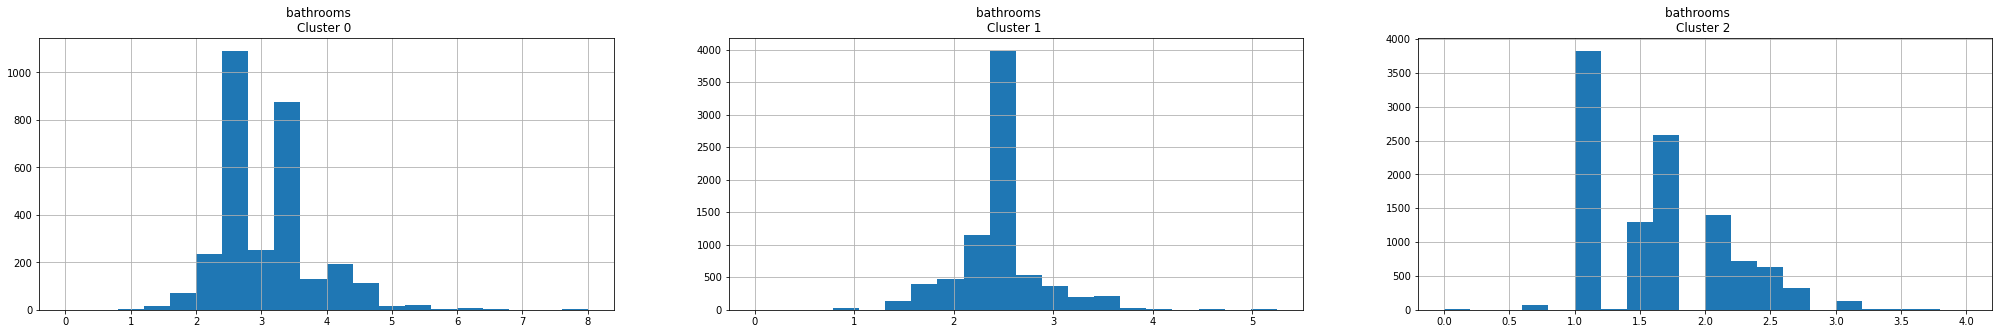

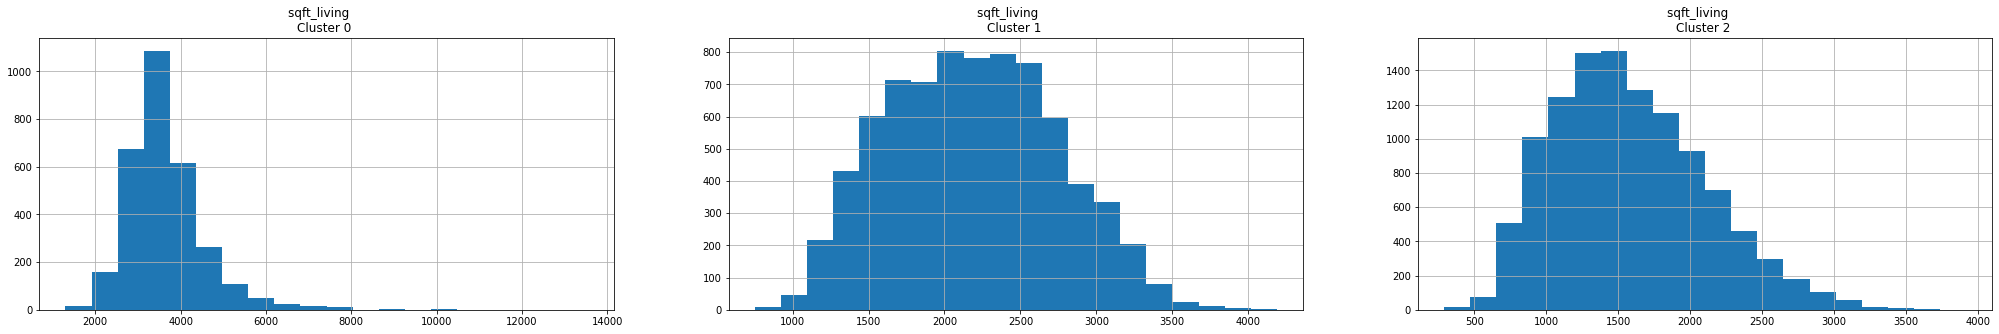

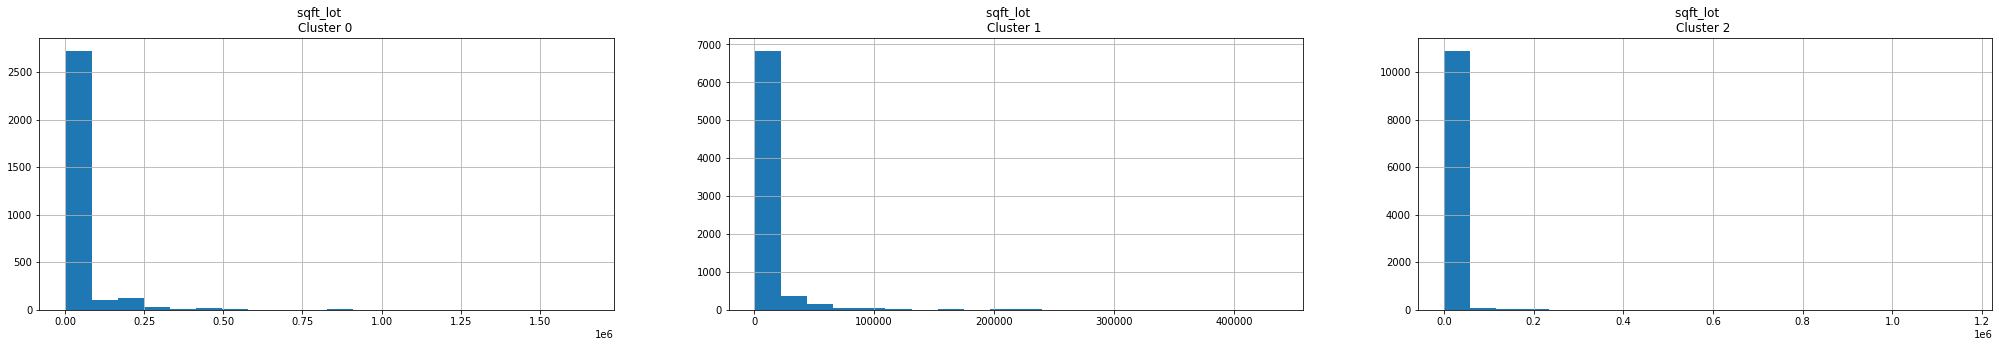

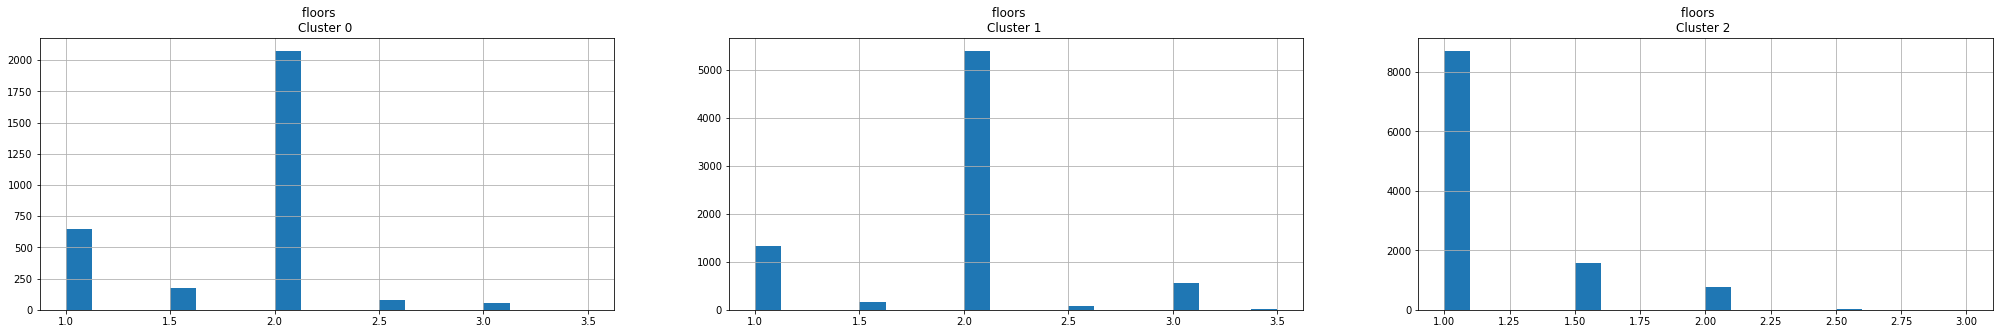

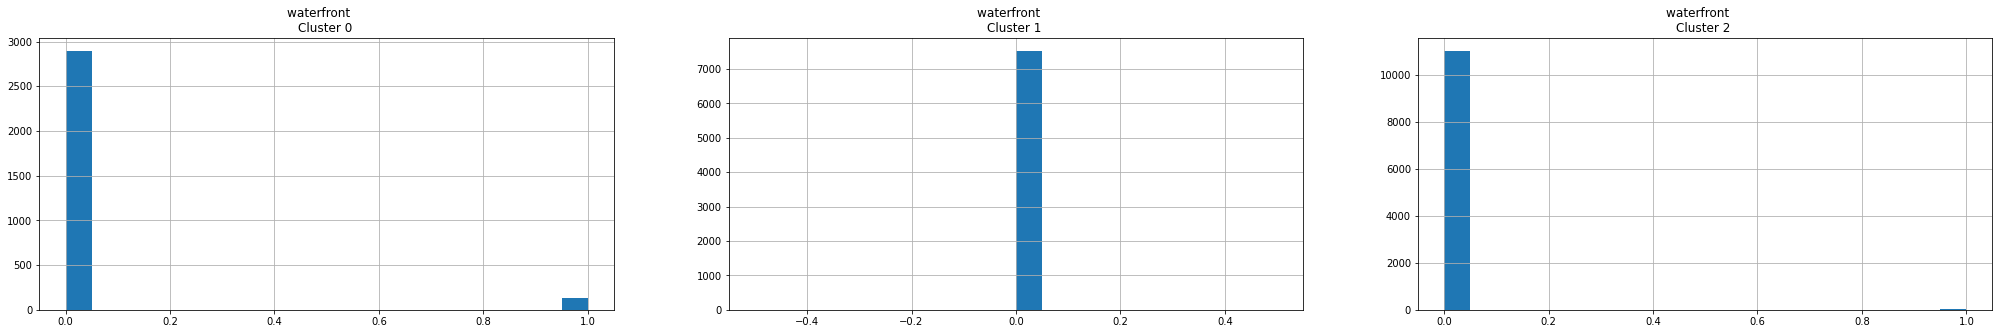

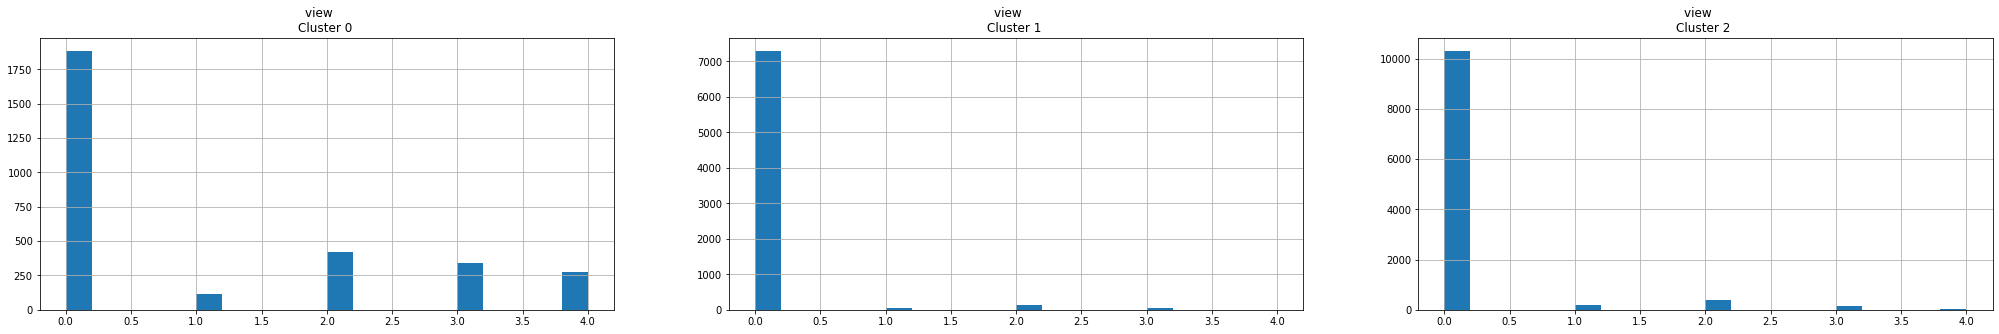

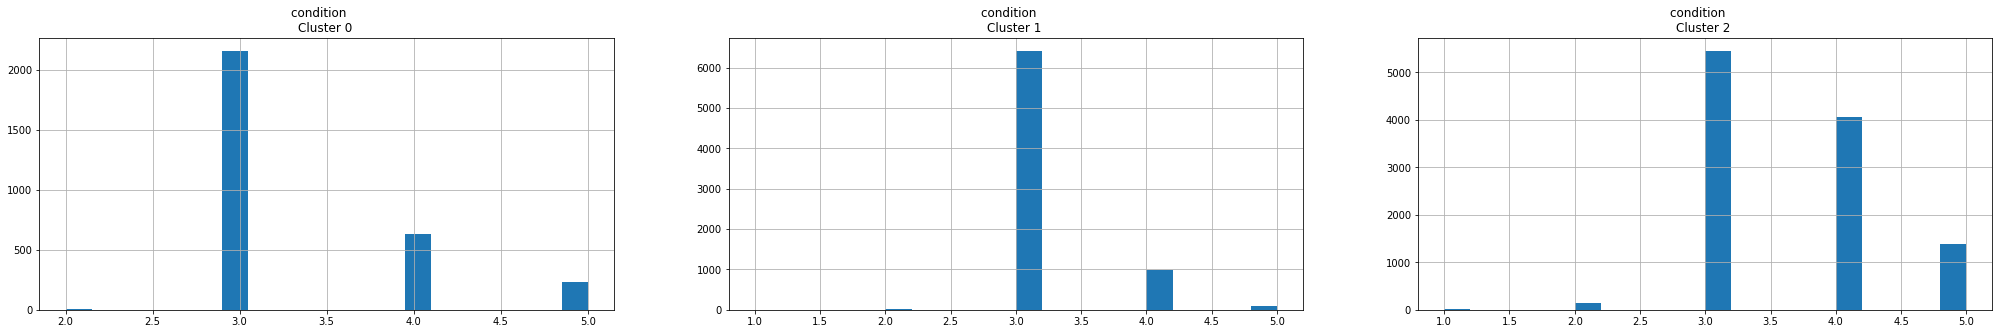

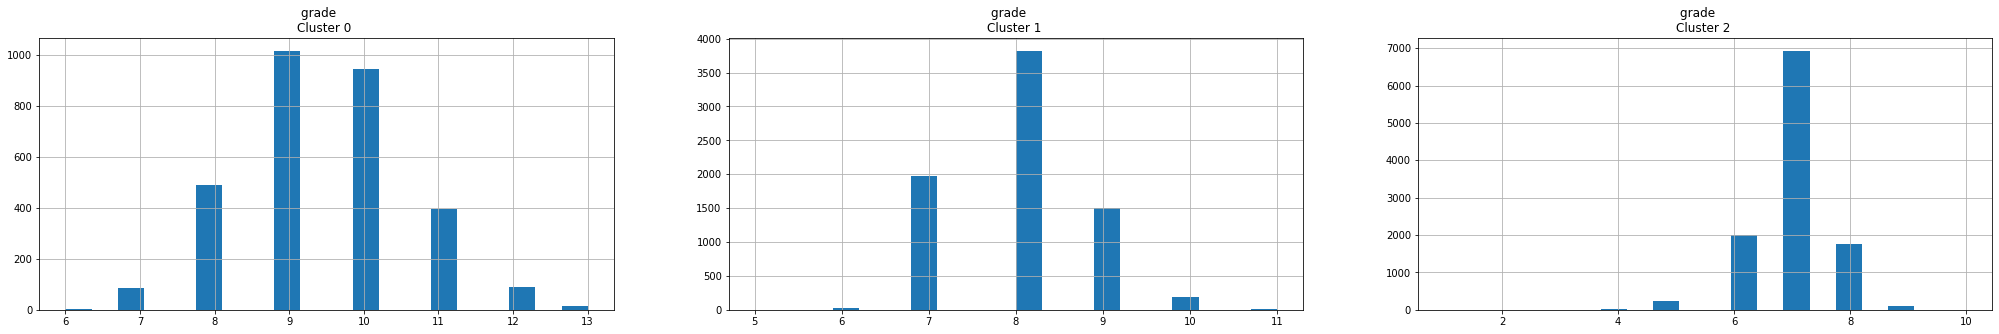

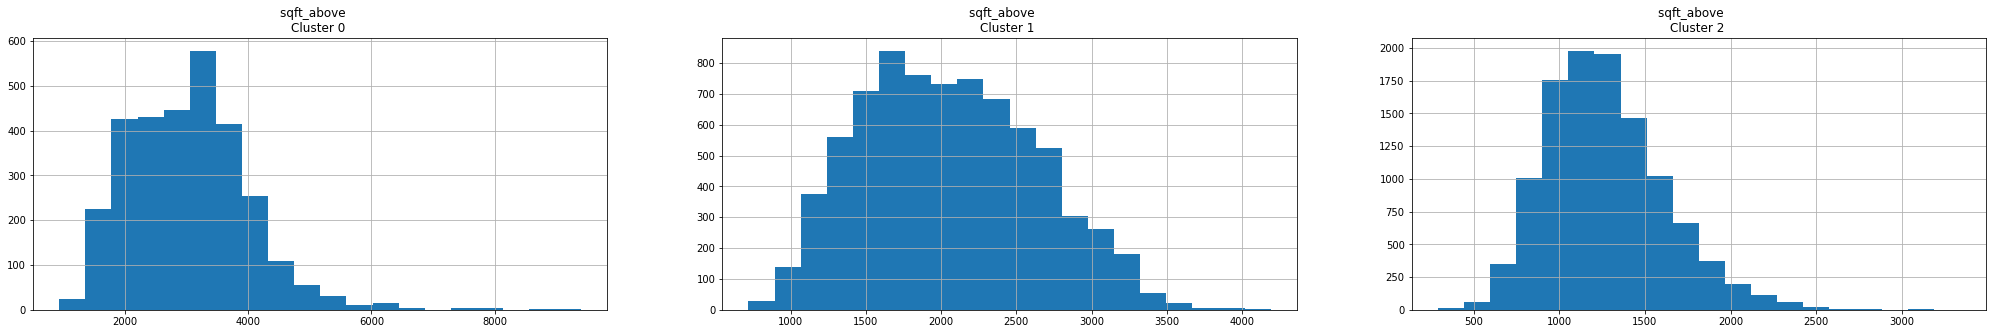

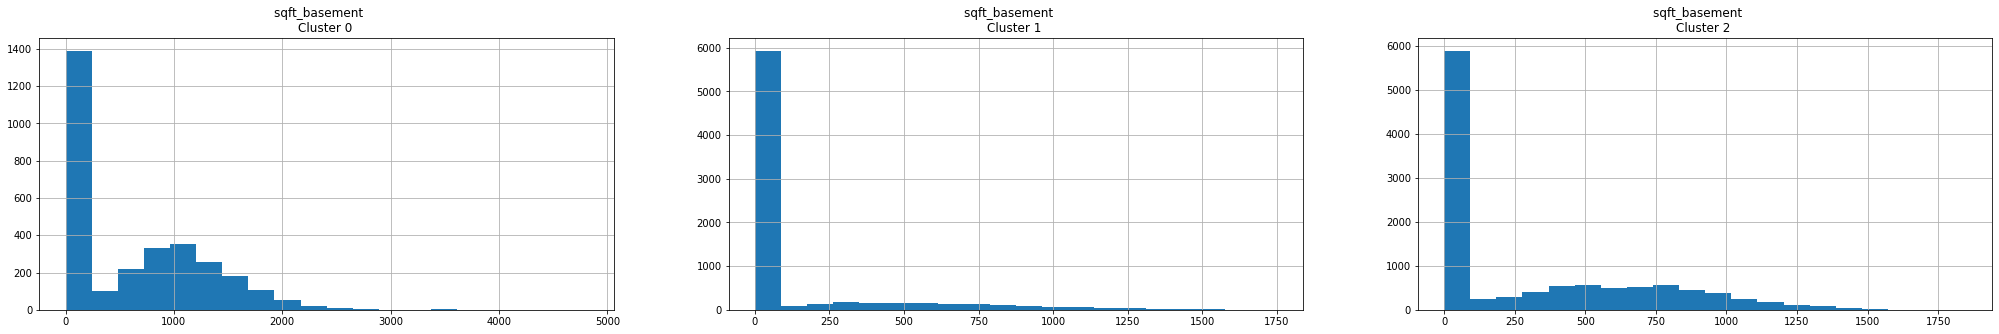

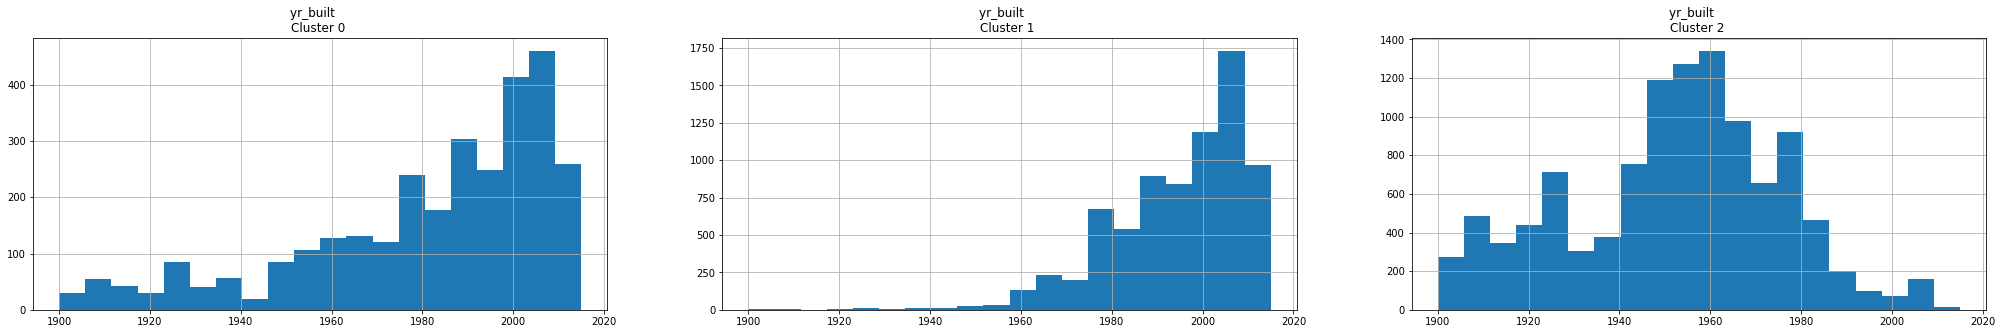

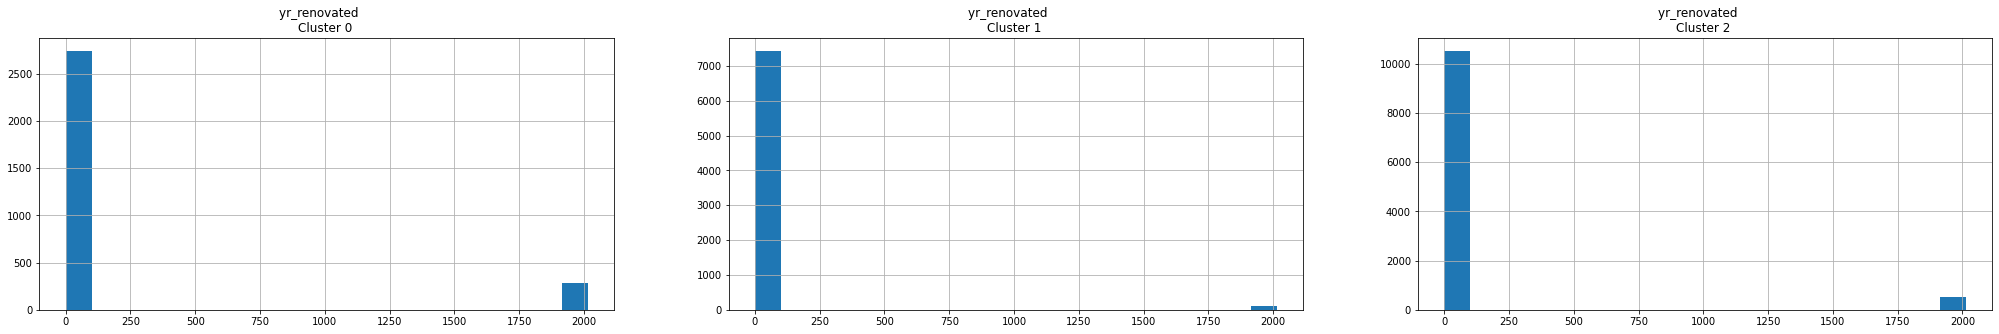

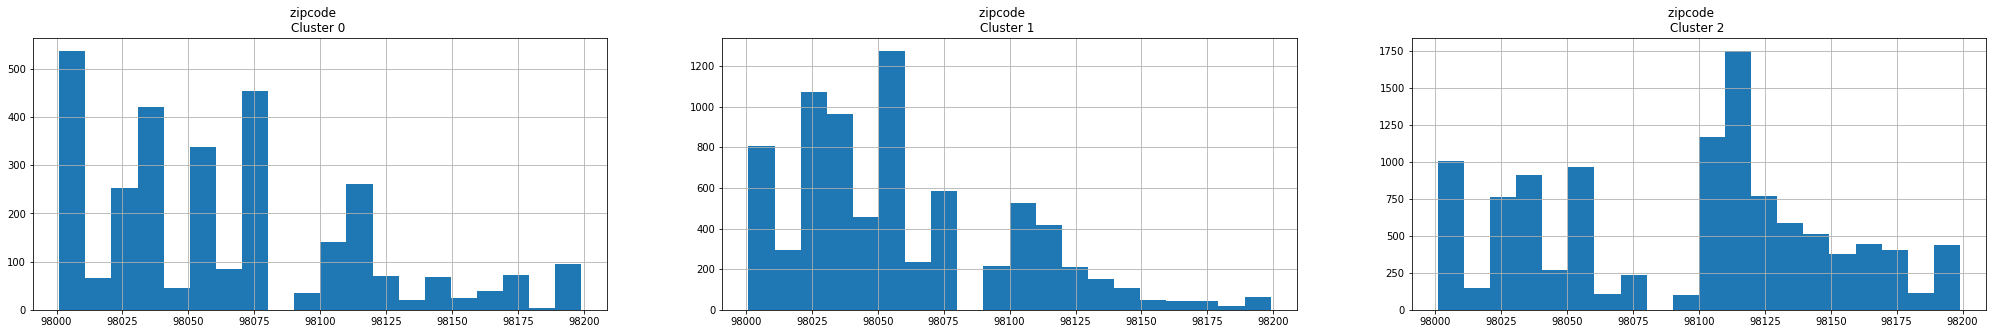

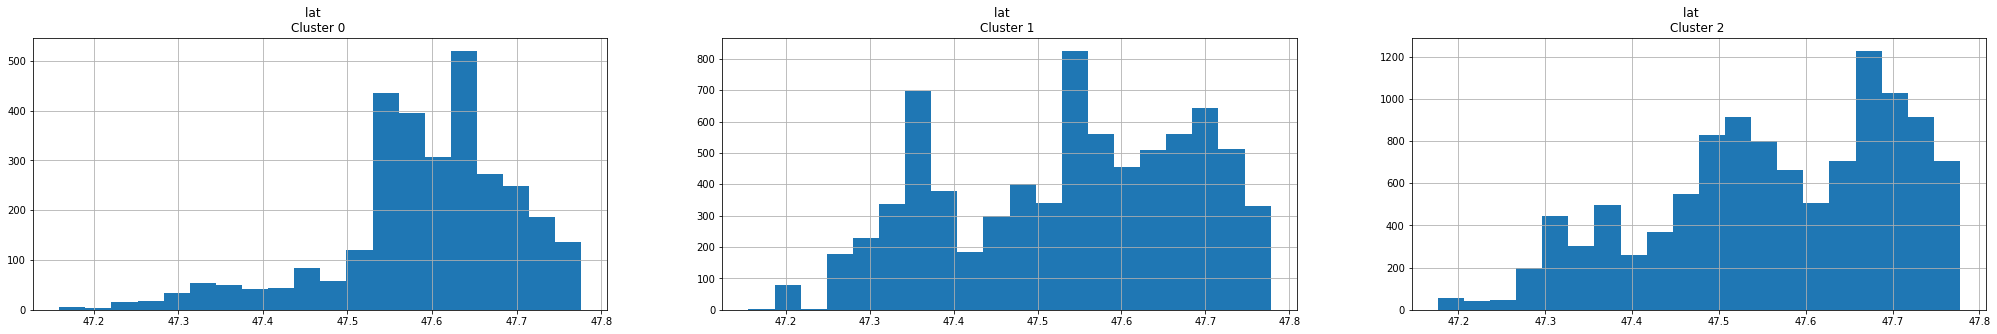

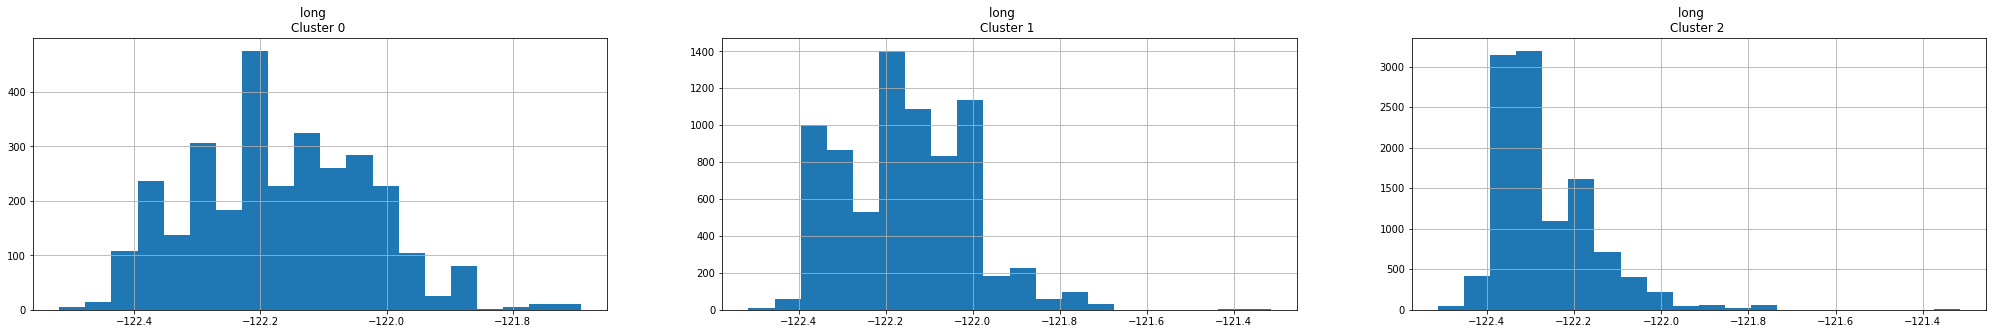

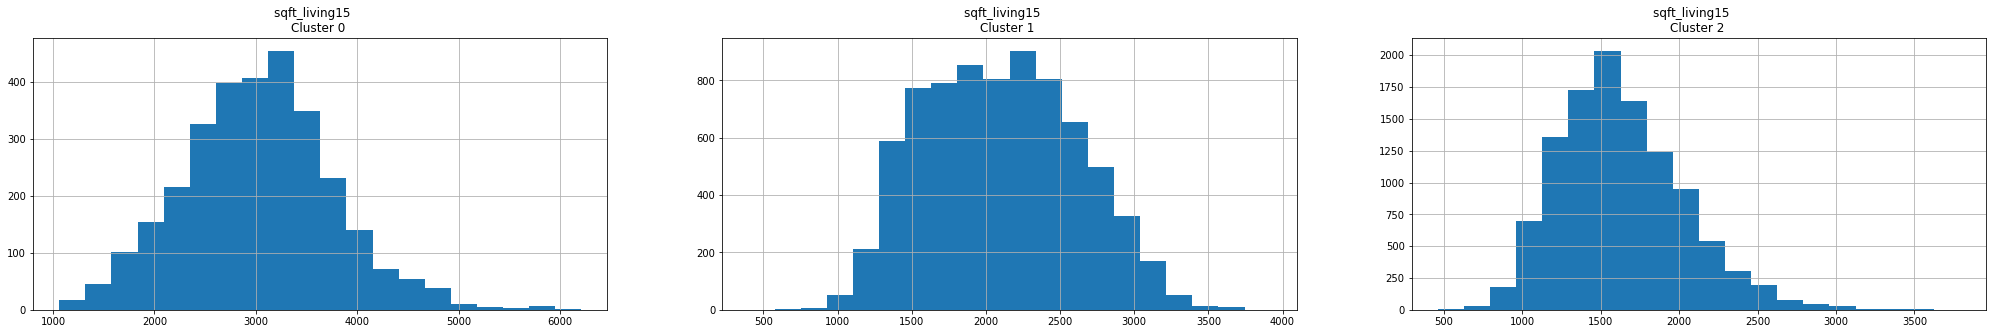

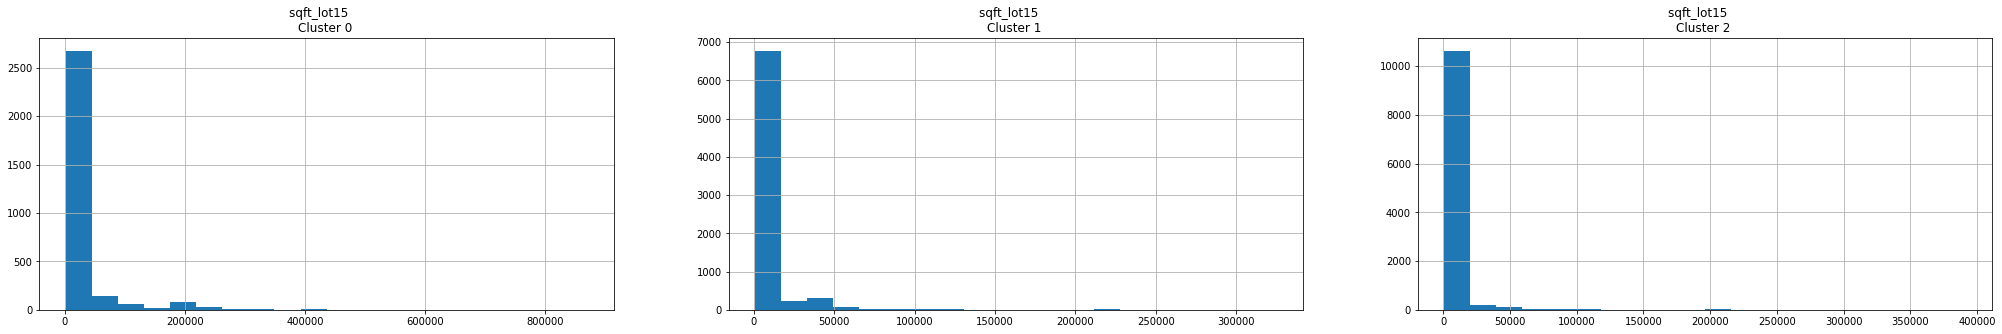

In [22]:
# Plot the histogram of various clusters
for i in df.drop(['kmeans Cluster Labels'], axis = 1).columns:
  plt.figure(figsize = (35, 5))
  for j in range(3):
    plt.subplot(1,3,j+1)
    cluster = df[df['kmeans Cluster Labels'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()

### **Examine Clusters**<a name = 'Examine'></a>

To examine each cluster and determine the discriminating features that distinguish each cluster

**Cluster 0: Super rich Cluster**

In [23]:
df[df['kmeans Cluster Labels']==0].describe().T

,count,mean,std,min,25%,50%,75%,max
kmeans Cluster Labels,3030.0,0.000000e+00,0.000000,0.0000,0.000000,0.0000,0.000000e+00,0.000000e+00
price,3030.0,1.120749e+06,596631.659987,293000.0000,772125.000000,949995.0000,1.300000e+06,7.700000e+06
bedrooms,3030.0,4.127063e+00,0.919701,0.0000,4.000000,4.0000,5.000000e+00,1.100000e+01
bathrooms,3030.0,3.069472e+00,0.747479,0.0000,2.500000,3.0000,3.500000e+00,8.000000e+00
sqft_living,3030.0,3.641048e+03,929.518013,1300.0000,3072.500000,3490.0000,4.030000e+03,1.354000e+04
sqft_lot,3030.0,3.853072e+04,89306.883122,1767.0000,7766.750000,12349.5000,2.613150e+04,1.651359e+06
floors,3030.0,1.789439e+00,0.458284,1.0000,1.500000,2.0000,2.000000e+00,3.500000e+00
waterfront,3030.0,4.455446e-02,0.206357,0.0000,0.000000,0.0000,0.000000e+00,1.000000e+00
view,3030.0,1.011551e+00,1.422430,0.0000,0.000000,0.0000,2.000000e+00,4.000000e+00
condition,3030.0,3.359736e+00,0.623065,2.0000,3.000000,3.0000,4.000000e+00,5.000000e+00


Cluster label 0 with mean house value of $1.12 million ranging from 7.7 million to 0.293 million dollars. Houses in this cluster consists of an average of 4 bedrooms with mean living area of 4127 Sqft. 15 houses in the immediate neighborhood were with an average area of 3021 sqft.  Houses in this cluster are located mostly on the Central North western regions of Kings County.This Seattle suburb is home to billionaires like Jeff Bezos and Bill Gates.  

**Cluster 1: Up scale Cluster**

In [24]:
df[df['kmeans Cluster Labels']==1].describe().T

,count,mean,std,min,25%,50%,75%,max
kmeans Cluster Labels,7522.0,1.000000,0.000000,1.0000,1.0000,1.00000,1.0000,1.000000e+00
price,7522.0,491297.817336,178817.687574,139500.0000,350000.0000,464950.00000,600000.0000,1.500000e+06
bedrooms,7522.0,3.486440,0.772579,0.0000,3.0000,3.00000,4.0000,8.000000e+00
bathrooms,7522.0,2.468260,0.402527,0.0000,2.2500,2.50000,2.5000,5.250000e+00
sqft_living,7522.0,2185.821457,557.083818,750.0000,1750.0000,2180.00000,2590.0000,4.190000e+03
sqft_lot,7522.0,12206.545733,25235.783158,609.0000,4200.0000,6969.00000,10000.0000,4.356000e+05
floors,7522.0,1.891452,0.498118,1.0000,2.0000,2.00000,2.0000,3.500000e+00
waterfront,7522.0,0.000000,0.000000,0.0000,0.0000,0.00000,0.0000,0.000000e+00
view,7522.0,0.060223,0.359075,0.0000,0.0000,0.00000,0.0000,4.000000e+00
condition,7522.0,3.149960,0.400579,1.0000,3.0000,3.00000,3.0000,5.000000e+00


Cluster label 1 with mean house value of $491298 ranging from 1.5 million to 139500 dollars. Houses in this cluster consists of an average of 3.5 bedrooms with mean living area of 2186 Sqft. 15 houses in the immediate neighborhood also had similar area, 2098 sqft. Houses in this cluster are widespread althroughout the Kings County. 

**Cluster 2: Mid range Cluster**

In [25]:
df[df['kmeans Cluster Labels']==2].describe().T

,count,mean,std,min,25%,50%,75%,max
kmeans Cluster Labels,11060.0,2.000000,0.000000,2.0000,2.00000,2.0000,2.0000,2.000000e+00
price,11060.0,414183.749819,185206.639164,75000.0000,270000.00000,381000.0000,517638.0000,1.565000e+06
bedrooms,11060.0,3.082369,0.851161,0.0000,3.00000,3.0000,4.0000,8.000000e+00
bathrooms,11060.0,1.612816,0.556086,0.0000,1.00000,1.7500,2.0000,4.000000e+00
sqft_living,11060.0,1580.210488,525.027871,290.0000,1180.00000,1520.0000,1920.0000,3.920000e+03
sqft_lot,11060.0,10663.217541,23651.659871,520.0000,5160.00000,7500.0000,9678.5000,1.164794e+06
floors,11060.0,1.143400,0.298755,1.0000,1.00000,1.0000,1.0000,3.000000e+00
waterfront,11060.0,0.002532,0.050254,0.0000,0.00000,0.0000,0.0000,1.000000e+00
view,11060.0,0.139783,0.557394,0.0000,0.00000,0.0000,0.0000,4.000000e+00
condition,11060.0,3.599367,0.727547,1.0000,3.00000,3.0000,4.0000,5.000000e+00


Cluster label 2 with mean house value of 414183 $ ranging from 1.57 million to 75000 million. Houses in this cluster consists of an average of 3 bedrooms with mean living area of 1580 Sqft. 15 houses in the immediate neighborhood also had similar area, 1627 sqft. Houses in this cluster are located mostly on the western regions of Kings County.

By means of bar plots and box plots the distinction in each cluster can fully be understood.

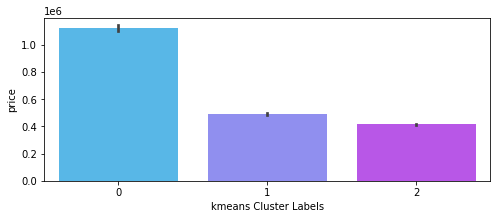

In [26]:
plt.subplots(figsize=(8,3))
sns.barplot(x = df['kmeans Cluster Labels'], y = df['price'], palette = 'cool');

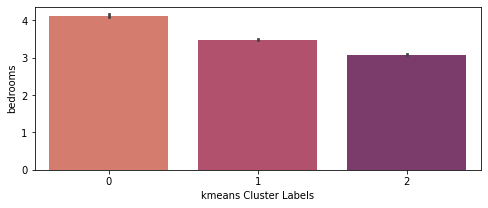

In [27]:
plt.subplots(figsize=(8,3))
sns.barplot(x = df['kmeans Cluster Labels'], y = df['bedrooms'], palette = 'flare');

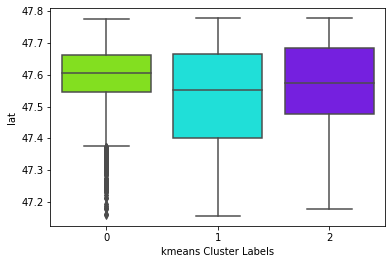

In [28]:
sns.boxplot(x = 'kmeans Cluster Labels', y = 'lat', data=df, palette ="hsv");

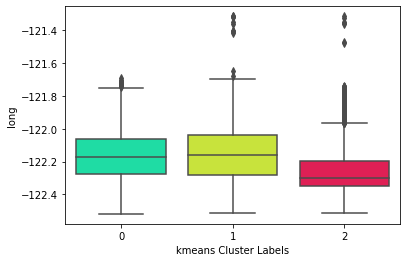

In [29]:
sns.boxplot(x = 'kmeans Cluster Labels', y = 'long', data=df, palette ="gist_ncar");

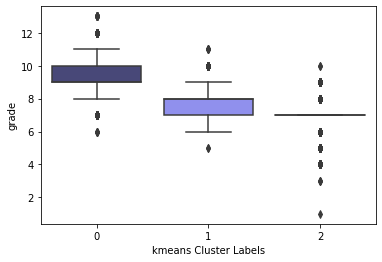

In [30]:
sns.boxplot(x = 'kmeans Cluster Labels', y = 'grade', data=df, palette ="gist_stern");

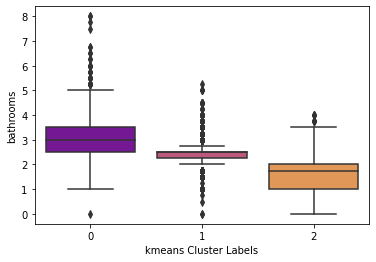

In [31]:
sns.boxplot(x = 'kmeans Cluster Labels', y = 'bathrooms', data=df, palette ="plasma");

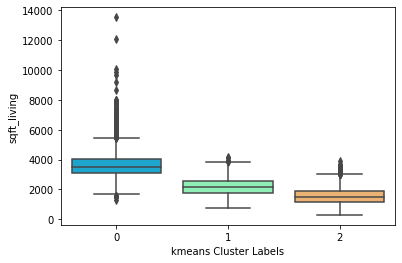

In [32]:
sns.boxplot(x = 'kmeans Cluster Labels', y = 'sqft_living', data=df, palette ="rainbow");

## **K-medoids Cluster Analysis**<a name ='kmedoids'></a>
K-medoids clustering is a technique in which we place each observation in a dataset into one of K clusters. K-Medoids Algorithm is also an unsupervised clustering algorithm in which data points called “medoids" act as the cluster's center, which is a point in the cluster whose dissimilarity (sum of distances) to all the objects in the cluster is minimal. The distance can be the Euclidean distance, Manhattan distance, or any other suitable distance function. The end goal is to have K clusters in which the observations within each cluster are quite similar to each other while the observations in different clusters are quite different from each other.

**Working of the Algorithm**

The steps taken by the K-medoids algorithm for clustering are as follows:-

1. Randomly select k points from the data( k is the number of clusters to be formed). These k points would act as the initial medoids.
2. The distances between the medoid points and the non-medoid points are calculated, and each point is assigned to the cluster of its nearest medoid.
3. Calculate the cost as the total sum of the distances(also called dissimilarities) of the data points from the assigned medoid.
4. Swap one medoid point with a non-medoid point(from the same cluster as the medoid point) and recalculate the cost. 
5. If the calculated cost with the new medoid point is more than the previous cost, undo the swap, and the algorithm converges 
6. else; repeat step 4
 
Finally, k medoid points with their clusters are created.

**Difference between K-means and K-medoids clustering**
1. K-means selects the average of all the cluster points as its center( which may or may not be one of the data points), while K-medoids always pick an actual data point as the cluster's center. 
2. K- means attempts to minimize the total squared error. In contrast, K-medoids attempts to minimize the sum of dissimilarities between the points labeled in the cluster and the cluster's center.

Because k-medoids computes cluster centroids using medians instead of means, it tends to be more robust to outliers compared to k-means. In practice, if there are no extreme outliers in the dataset then k-means and k-medoids will produce similar results.

**Advantages of the K-medoids algorithm**
1. K- medoids algorithm is robust to outliers and noise as the medoids are the most central data point of the cluster, such that its distance from other points is minimal. 
2. K-Medoids algorithm can be used with arbitrarily chosen dissimilarity measures (e.g., cosine similarity) or any distance metric.

References: 
1. [K-Medoids Algorithm ](https://www.codingninjas.com/codestudio/library/k-medoids-algorithm)
2. [K-Medoids in R: Step-by-Step Example](https://www.statology.org/k-medoids-in-r/)

In [33]:
pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 3.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [34]:
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=3).fit(Clus_dataSet)

In [35]:
kmedoids.labels_

array([1, 0, 2, ..., 1, 1, 1])

In [36]:
kmedoids.labels_.shape

(21612,)

In [37]:
kmedoids.cluster_centers_[0:2]

array([[ 0.2993967 ,  0.69444556,  0.50018986,  0.4900496 , -0.20780522,
         0.01049699, -0.08717466, -0.3057672 , -0.62914619,  0.29188511,
        -0.08263176,  1.17157397,  0.13596702, -0.21013346,  0.69267404,
         0.82024093, -0.49784109,  0.23843401, -0.27427464],
       [-0.51776018, -0.40692359,  0.17558163, -0.07613056, -0.2585048 ,
         0.01049699, -0.08717466, -0.3057672 , -0.62914619, -0.55885272,
         0.26757793, -0.65864212,  0.51046115, -0.21013346, -0.42872162,
        -0.62461023,  0.17674982, -0.38895815, -0.31430522]])

In [38]:
kmedoids.cluster_centers_.shape

(3, 19)

In [39]:
cluster_centers = pd.DataFrame(data = kmedoids.cluster_centers_, columns = [df.drop('kmeans Cluster Labels', axis = 1).columns])
cluster_centers

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.299397,0.694446,0.500190,0.490050,-0.207805,0.010497,-0.087175,-0.305767,-0.629146,0.291885,-0.082632,1.171574,0.135967,-0.210133,0.692674,0.820241,-0.497841,0.238434,-0.274275
1,-0.517760,-0.406924,0.175582,-0.076131,-0.258505,0.010497,-0.087175,-0.305767,-0.629146,-0.558853,0.267578,-0.658642,0.510461,-0.210133,-0.428722,-0.624610,0.176750,-0.388958,-0.314305
2,-0.299852,-0.406924,-0.149027,-0.185011,-0.243053,0.010497,-0.087175,-0.305767,-0.629146,0.291885,0.146816,-0.658642,-0.000213,-0.210133,-0.073613,0.513517,1.085672,-0.009605,-0.311082


**In order to understand what these numbers mean, let's perform inverse transformation**

In [40]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.drop('kmeans Cluster Labels', axis = 1).columns])
cluster_centers

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,650000.0,4.0,2.50,2530.0,6500.0,1.5,8.673617e-19,0.0,3.0,8.0,1720.0,810.0,1975.0,0.0,98115.0,47.6737,-122.284,2150.0,5280.0
1,350000.0,3.0,2.25,2010.0,4400.0,1.5,8.673617e-19,0.0,3.0,7.0,2010.0,0.0,1986.0,0.0,98055.0,47.4735,-122.189,1720.0,4187.0
2,430000.0,3.0,2.00,1910.0,5040.0,1.5,8.673617e-19,0.0,3.0,8.0,1910.0,0.0,1971.0,0.0,98074.0,47.6312,-122.061,1980.0,4275.0


In [41]:
cluster_centers.T

,0,1,2
price,6.500000e+05,3.500000e+05,4.300000e+05
bedrooms,4.000000e+00,3.000000e+00,3.000000e+00
bathrooms,2.500000e+00,2.250000e+00,2.000000e+00
sqft_living,2.530000e+03,2.010000e+03,1.910000e+03
sqft_lot,6.500000e+03,4.400000e+03,5.040000e+03
floors,1.500000e+00,1.500000e+00,1.500000e+00
waterfront,8.673617e-19,8.673617e-19,8.673617e-19
view,0.000000e+00,0.000000e+00,0.000000e+00
condition,3.000000e+00,3.000000e+00,3.000000e+00
grade,8.000000e+00,7.000000e+00,8.000000e+00


**Create a new dataframe that includes the cluster. Insert clustering labels to the original dataframe**

In [42]:
df.insert(0, 'kmedoids Cluster Labels', kmedoids.labels_)
df.head()

,kmedoids Cluster Labels,kmeans Cluster Labels,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1,2,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,0,2,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,2,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,0,2,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2,1,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## **K-medoids Cluster data visualization**<a name= 'Visual2'></a>

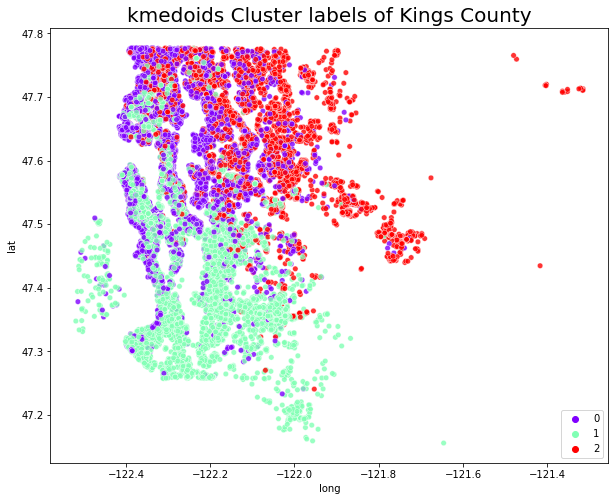

In [43]:
# visualization of the results with a scatter plot
fig = plt.figure(figsize=(10, 8))
plt.title('kmedoids Cluster labels of Kings County', loc='center', fontsize=20)
sns.scatterplot(x=df.long, y = df.lat, alpha = .8,s = 30, 
                hue=df["kmedoids Cluster Labels"], palette="rainbow", legend= 'auto')
plt.legend(loc = 'lower right');

The distinction among clusters is clearly demarcated in kmedoids clustering.  This one has created better clusters than kmeans algorithm for this data. 

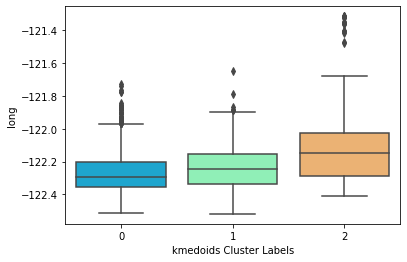

In [44]:
sns.boxplot(x = 'kmedoids Cluster Labels', y = 'long', data=df, palette ="rainbow");

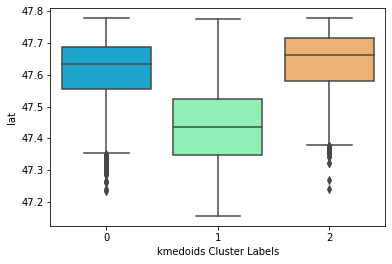

In [45]:
sns.boxplot(x = 'kmedoids Cluster Labels', y = 'lat', data=df, palette ="rainbow");

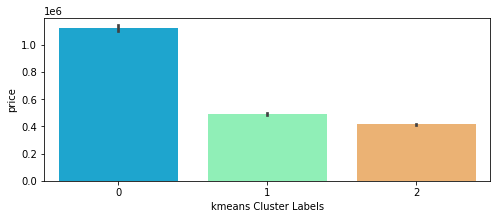

In [46]:
plt.subplots(figsize=(8,3))
sns.barplot(x = df['kmeans Cluster Labels'], y = df['price'], palette = 'rainbow');

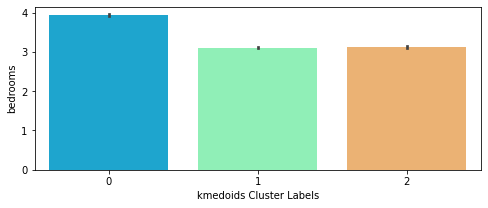

In [47]:
plt.subplots(figsize=(8,3))
sns.barplot(x = df['kmedoids Cluster Labels'], y = df['bedrooms'], palette = 'rainbow');

## **DBSCAN algorithm for Clustering Houses in King County**<a name = 'DBSCAN'></a>

**DBSCAN algorithm: Theory**

Most of the traditional clustering techniques, such as k-means, hierarchical and fuzzy clustering, can be used to group data without supervision.
However, when applied to tasks with arbitrary shape clusters, or clusters within cluster, the traditional techniques might be unable to achieve good results. That is, elements in the same cluster might not share enough similarity or the performance may be poor. Additionally, Density-based Clustering locates regions of high density that are separated from one another by regions of low density. Density, in this context, is defined as the number of points within a specified radius.

In this section, the main focus will be manipulating the data and properties of DBSCAN and observing the resulting clustering.

DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise. This technique is one of the most common clustering algorithms which works based on density of object.  In other words, the DBSCAN method is a density-based clustering algorithm used to separate high-density from low-density regions. This algorithm is based on two hyperparameters:

**The radius (eps):** The maximum distance between two samples to be considered as neighbors. 

**The minimum number of points (MinPts):** The number of samples in the neighborhood to consider an observation a core point.

Based on these hyperparameters, the DBSCAN algorithm classifies every observation in the data set as a core, border, or outlier point, according to the following rules:
* Core point: A data point that has at least MinPts observations within its radius eps.
* Border point: A data point that is within its radius eps less than MinPts points; however, the point is within the radius eps of a core point.
* Outlier point: A data point that is neither a core point nor a border point.

Then, the points are assigned to clusters based on their types. Each cluster contains at least one core point and all border points that are reachable from it.

**Advantages and disadvantages**

The DBSCAN algorithm offers multiple advantages with respect to other clustering algorithms. The major strength of the DBSCAN algorithm is that it can find out clusters of any shape. The clusters do not have to have a blob shape. Additionally, it is not necessary to fix the number of clusters before executing the algorithm, as we have to do with the K-means method. Furthermore, DBSCAN is capable of detecting noise in the data set, in contrast to partitional-based algorithms such as K-means which assign all points to a cluster. With DBSCAN, the points located in the regions of low density are not assigned to any cluster.

However, the DBSCAN method has also some disadvantages. The main challenge of the algorithm is to find the right combination of the two hyperparameters (eps and MinPts). The choice of these hyperparameters is arbitrary and highly affects the results obtained with the algorithm. A common practice is to test different sets of hyperparameters and choose the one that produces acceptable results taking into consideration the number of clusters and the outliers generated.


**Implementation of the DBSCAN algorithm with Scikit-Learn**

The next step consists of using the DBSCAN algorithm to recognize these locations.
To implement the DBSCAN algorithm, first instantiate a DBSCAN model, which can be imported from sklearn.cluster. As can be seen below, the hyperparameters chosen for this particular dataset are: (1) eps= , and (2) min_samples=. These parameters were defined by trial and error. Notice that before applying the DBSCAN algorithm, normalize the data points with the MinMaxScaler class, so that all attributes (latitude and longitude) have the same range [0, 1].


In [48]:
df_DB = df[['long', 'lat']]
# normalization of the data using the min max method
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# normalization - fit and transform the data
df_scaled = scaler.fit_transform(df_DB)

House location Labels : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, -1}


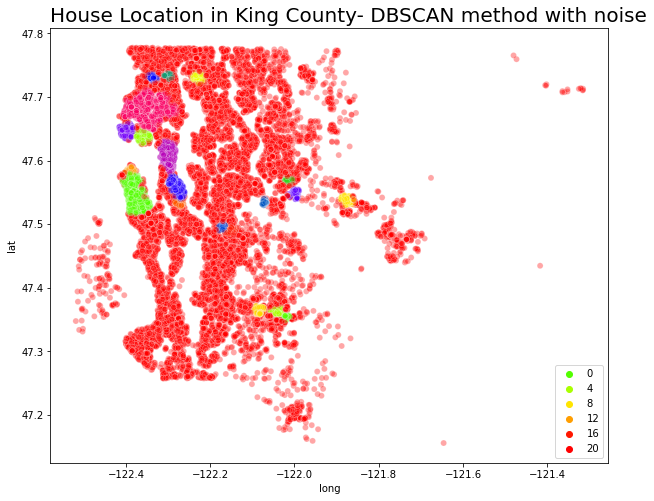

In [49]:
# apply the dbscan algorithm to the dataset
from sklearn.cluster import DBSCAN 
house_location = DBSCAN(eps=0.009, min_samples=70).fit(df_scaled) # Use trial and error

# labels of the clusters
labels_house_location = house_location.labels_
print('House location Labels :', set(house_location.labels_))

# visualization of the results with a scatter plot
fig = plt.figure(figsize=(10, 8))
plt.title('House Location in King County- DBSCAN method with noise', loc='left', fontsize=20)
sns.scatterplot(x=df.long, y=df.lat, alpha=.35,
                hue=labels_house_location, palette="prism", legend= 'auto')
plt.legend(loc = 'lower right');

The number of clusters can be detrmined by looking at the unique values of the labels. As can be seen, some observations have an index equal to -1, meaning those observations are detected as outliers by the algorithm. In order to visualize the clusters excluding the noise (observations associated with a label equal to -1) discard labels = -1.

In [50]:
# exclude the observations with a label equal to -1. 
df_filtered = df_DB[house_location.labels_ != -1]

# exclude the labels equal to -1
labels_house_location_filtered = labels_house_location[labels_house_location != -1]

To plot the labels associated with each group in the cluster center, find the mean of crime data points as follows.

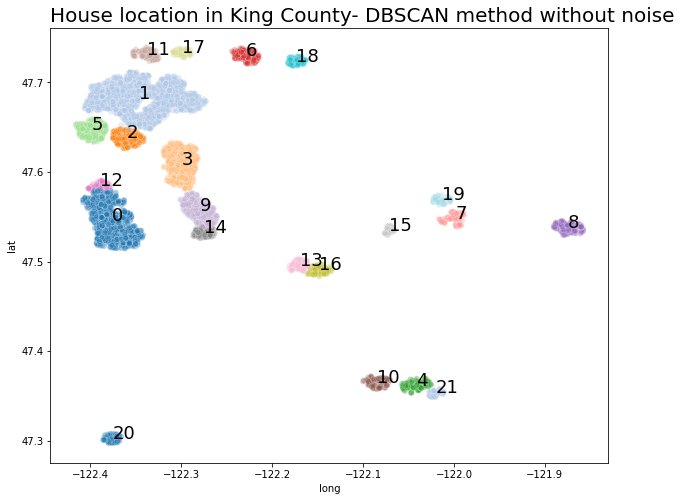

In [51]:
# calculate the center of each cluster
mean_location_clusters = []
for group in np.unique(labels_house_location_filtered):
    mean_location_clusters.append(list(df_filtered[labels_house_location_filtered==group].mean()))

# visualization of the results with a scatter plot
fig = plt.figure(figsize=(10, 8))
plt.title('House location in King County- DBSCAN method without noise', loc='left', fontsize=20)
ax = sns.scatterplot(x=df_filtered.long, y=df_filtered.lat, alpha=.35,
                hue=labels_house_location_filtered, palette="tab20", legend=None);

# visualize the label associated to each cluster
for index, location in enumerate(mean_location_clusters):
    plt.text(location[0], location[1], str(index), fontsize=18);

### **Visualization of Cluster points on Folium map**

In [52]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Seattle_explorer")
address = 'Seattle'
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of King County, Seattle are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of King County, Seattle are 47.6038321, -122.3300624.


In [53]:
# create map and display it
import folium
from folium.plugins import HeatMap
Seattle_heat_map = folium.Map(location=[(latitude-0.15), (longitude+0.30)], zoom_start=10)

# creation of a Heat map
HeatMap(df[['lat', 'long']], radius=20, blur=20).add_to(Seattle_heat_map)

for index, location in enumerate(mean_location_clusters):
    folium.map.Marker(location=[location[1], location[0]],
                      icon=folium.plugins.BeautifyIcon(icon='plane', border_color='red',
                                                       text_color='blue',
                                                       background_color = 'yellow',
                                                       border_width = 2,
                                                       number=index,
                                                       icon_shape='marker')).add_to(Seattle_heat_map)


# show the map
Seattle_heat_map

In [54]:
# creation of an empty map of King County
import folium
Seattle_map = folium.Map(location=[(latitude-0.15), (longitude+0.30)], zoom_start=10)

for index, location in enumerate(mean_location_clusters):
    folium.map.Marker(location=[location[1], location[0]],
                      icon=folium.plugins.BeautifyIcon(icon='plane', border_color='red',
                                                       text_color='blue',
                                                       background_color = 'yellow',
                                                       border_width = 2,
                                                       number=index,
                                                       icon_shape='marker')).add_to(Seattle_map)
# show map
Seattle_map